# Task 4.10. Final reporting

# **CONTENTS**

### 1. Importing libraries and the data from 4.9.


### 2. PII data 

### 3. Comparing customer behavior in different geographic areas.

#### 3.1. Regional segmentation 
#### 3.2. Spending habits of the regions
    
### 4. Excluding low-activity customers 

### 5. Creating customer profiles

#### 5.1. Age 
#### 5.2. Income
#### 5.3. Dependants
#### 5.4. Food preferences

### 6. Visualizations for user profiles
#### 6.1. Customer age groups 
#### 6.2. Customer income groups
#### 6.3. Family types 
#### 6.4. Food preferences 
    
### 7. Aggregation of  the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
#### 7.1. Customer age groups 
#### 7.2. Customer income groups
#### 7.3. Family types 
#### 7.4. Food preferences 

### 8. Customer profiles across regions and departments (crosstables)
#### 8.1. Customer profiles across regions
##### 8.1.1. Customer age groups 
##### 8.1.2. Customer income groups
##### 8.1.3. Family types 
##### 8.1.4. Food preferences 

#### 8.2. Customer profiles across departments
##### 8.2.1. Customer age groups 
##### 8.2.2. Customer income groups
##### 8.2.3. Family types 
##### 8.2.4. Food preferences 

### 9. Visualizations of step 8
#### 9.1. Preparatory work
#### 9.2. Visualizations for regions
##### 9.2.1. Customer age groups across regions 
##### 9.2.2. Customer income groups across regions 
##### 9.2.3. Family types across regions 
##### 9.2.4. Food preferences across regions 

#### 9.3. Visualizations for departments 
##### 9.3.1. Customer age groups across departments 
##### 9.3.2. Customer income groups across departments 
##### 9.3.3. Family types across departments 
##### 9.3.4. Food preferences across departments

### 10. 10. Additional visualizations
#### 10.1. Price ranges
#### 10.2. Orders by time of the day groups
#### 10.3. Brand loyalty groups
#### 10.4. Brand loyalty and department popularity
#### 10.5. Spender type pie

### 11. Saving the notebook

#                                     ** NOTEBOOK STARTS HERE**

# 1. Importing libraries and the data from 4.9. 

In [2]:
#Panda libraries 

import pandas as pd
import numpy as np
import os

#Viz libraries 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy



In [3]:
#Importing the dataset 

path = r'/Users/alexbor/Desktop/Data Analytics/Immersion/Submissions/Instacart Basket Analysis'

ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data ', 'Prepared data', 'ords_prods_cust_merge.pkl'))

# Step 2. PII data 

In [4]:
#First Name and Last Name in the dataframe are sensitive data, I decided to drop these columns.

ords_prods_cust_merge = ords_prods_cust_merge.drop(columns = ['First Name', 'Last Name'])

In [5]:
#Checking the result. The columns were deleted. 

ords_prods_cust_merge.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined',
       'Number of dependants', 'fam_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'orders_time',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest day', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_prices', 'spender_type',
       'median_days_since_prior_order', 'user_activity', '_merge'],
      dtype='object')

# Step 3.  Comparing customer behavior in different geographic areas.

# 3.1.  Regional segmentation 

In [6]:
#Organize the states into regions by creating lists

northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']


In [7]:
#Create a column "Regions" and assign region flags to each region list

ords_prods_cust_merge.loc[ords_prods_cust_merge['STATE'].isin(northeast), 'Region'] = 'Northeast'

In [8]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['STATE'].isin(midwest), 'Region'] = 'Midwest'

In [9]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['STATE'].isin(west), 'Region'] = 'West'

In [10]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['STATE'].isin(south), 'Region'] = 'South'

In [11]:
#Check the new column "Region"

ords_prods_cust_merge['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

# 3.2. Spending habits of the regions 

In [12]:
#Create a cross table to see the spending habits by regions 

crosstab_regions_spend = pd.crosstab(ords_prods_cust_merge['Region'], ords_prods_cust_merge['spender_type'], dropna = False)


In [13]:
#Show the table 

crosstab_regions_spend

spender_type,High spender,Low spender
Region,,
Midwest,12917,7441350
Northeast,8975,5614511
South,20500,10582194
West,12242,8132559


South is the region with the highest number of items bought by both - High spenders and Low spenders. High spenders and Low spenders in Northeast bought the least of items, whereas Midwest and West show relatively similar numbers of bought items (Midwest has 6% more high spenders than West; and West has 9% more low spenders than Midwest). 

# Step 4. Excluding low-activity customers 

In [14]:
#Creating a column with the transform function where orders are grouped by user_ids. 
ords_prods_cust_merge['Number of orders'] = ords_prods_cust_merge.groupby(['user_id'])['order_number'].transform(np.max)

In [15]:
#Creating a column 'Customers activity' with flags 'low' and 'high' looking at the column 'Nmber of orders'

ords_prods_cust_merge.loc[ords_prods_cust_merge['Number of orders'] < 5, 'Customer activity'] = 'Low'

In [16]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['Number of orders'] >= 5, 'Customer activity'] = 'High'

In [17]:
#Checking the result 

ords_prods_cust_merge['Customer activity'].value_counts(dropna = False)

High    30964564
Low      1440295
Name: Customer activity, dtype: int64

In [18]:
#Creating a subset containing only low-activity customers ('Low')
low_customer_activity = ords_prods_cust_merge[ords_prods_cust_merge['Customer activity'].str.contains('Low')]

In [19]:
#Exporting the 'Low' subset
low_customer_activity.to_pickle(os.path.join(path, '02 Data ', 'Prepared data', 'low_customer_activity.pkl'))

In [20]:
#Dropping the low-activity customers data using a boolean mask

ords_prods_cust_merge = ords_prods_cust_merge[ords_prods_cust_merge['Customer activity'] != 'Low']

In [21]:
#Checking the result
 
ords_prods_cust_merge['Customer activity'].value_counts(dropna = False)

High    30964564
Name: Customer activity, dtype: int64

In [22]:
#Export the dataframe with high-activity customers just in case...This is the file I continued working with

ords_prods_cust_merge.to_pickle(os.path.join(path, '02 Data ', 'Prepared data', 'high_customer_activity.pkl'))

In [23]:
#Since there are only high-activity customers in the dataframe now, there is no need to keep the column "Customer activity"
#I deleted the column "Customer activity"

ords_prods_cust_merge = ords_prods_cust_merge.drop(columns=['Customer activity'])

# Step 5. Creating customer profiles 

# 5.1. Age 

In [24]:
#Analysing age.
#check the data description
ords_prods_cust_merge['Age'].describe()


count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

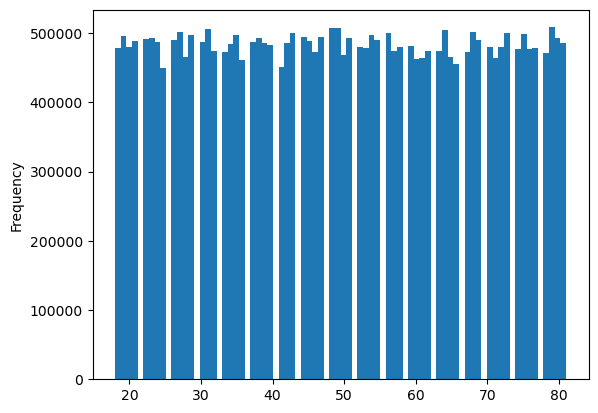

In [25]:
#Create a histogram to see the distribution of age 

hist_age = ords_prods_cust_merge['Age'].plot.hist(bins=80)

**The frequency of the age groups are relatively equal. I will divide the users in four groups taking into consideration the quartiles. Hence, from 18 till 33 = Young Adults; from 34 till 49 - Adults; from 50 till 65 - Middle-aged; older than 65 - Senior.** 

In [26]:
#Create a column with age labels. 

ords_prods_cust_merge.loc[ords_prods_cust_merge['Age'] < 34, 'Customer age group'] = 'Young adult'

In [27]:
ords_prods_cust_merge.loc[(ords_prods_cust_merge['Age'] >= 34) & (ords_prods_cust_merge['Age'] <= 49 ),'Customer age group'] = 'Adult'

In [28]:
ords_prods_cust_merge.loc[(ords_prods_cust_merge['Age'] >= 50) & (ords_prods_cust_merge['Age'] <= 65 ),'Customer age group'] = 'Middle aged'

In [29]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['Age'] > 65, 'Customer age group'] = 'Senior'

In [30]:
#Check the results. The numbers of users are almost equal in the groups. 
ords_prods_cust_merge['Customer age group'].value_counts(dropna=False)

Adult          7790824
Young adult    7757465
Senior         7730834
Middle aged    7685441
Name: Customer age group, dtype: int64

# 5.2. Income

In [31]:
#Check the description of the income column 

ords_prods_cust_merge['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

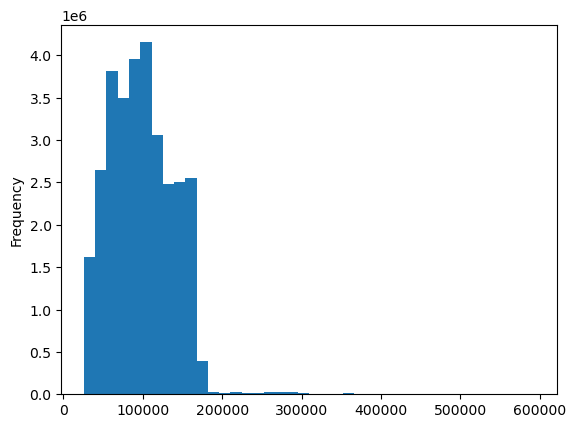

In [32]:
#Create a histogram to see the distribution of income 

hist_age = ords_prods_cust_merge['income'].plot.hist(bins=40)

**The majority earns from about 70k to 110k per year. From 110k till 200k has a lower frequency. From 200k on the frequency is very low. I decided to divide the users into 4 groups: under 70k - Low income, from 70k to 110k - Averagne income, from 110k to 200k - High income, from 200 - Extremely high income.** 

In [33]:
#Create a column 'Customer income groups' with flags 

ords_prods_cust_merge.loc[ords_prods_cust_merge['income'] < 70000, 'Customer income group'] = 'Low income'

In [34]:
ords_prods_cust_merge.loc[(ords_prods_cust_merge['income'] >= 70000) & (ords_prods_cust_merge['income'] <= 110000 ),'Customer income group'] = 'Average income'


In [35]:
ords_prods_cust_merge.loc[(ords_prods_cust_merge['income'] > 110000) & (ords_prods_cust_merge['income'] <= 200000 ),'Customer income group'] = 'High income'



In [36]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['income'] > 200000, 'Customer income group'] = 'Extremely high income'

In [37]:
#Check the results

ords_prods_cust_merge['Customer income group'].value_counts(dropna=False)

High income              11315994
Average income           10873895
Low income                8520533
Extremely high income      254142
Name: Customer income group, dtype: int64

# 5.3. Dependants 

In [38]:
#Check the value counts 
ords_prods_cust_merge['Number of dependants'].value_counts(dropna=False)

3    7772516
0    7739681
2    7733261
1    7719106
Name: Number of dependants, dtype: int64

In [39]:
#Describe the data 
ords_prods_cust_merge['Number of dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: Number of dependants, dtype: float64

**I decided to divide the data into three groups: 'Childless family' (0); 'Nuclear family (1-2)'; 'Large-family (3 and more)'**

In [40]:
#Create a column 'Family type' and flags 

ords_prods_cust_merge.loc[ords_prods_cust_merge['Number of dependants'] == 0, 'Family type'] = 'Childless family'

In [41]:
ords_prods_cust_merge.loc[(ords_prods_cust_merge['Number of dependants'] > 0) & (ords_prods_cust_merge['Number of dependants'] <= 2), 'Family type'] = 'Nuclear family (1-2 kids)'


In [42]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['Number of dependants'] >= 3, 'Family type'] = 'Large family'

In [43]:
#Check the results

ords_prods_cust_merge['Family type'].value_counts(dropna=False)

Nuclear family (1-2 kids)    15452367
Large family                  7772516
Childless family              7739681
Name: Family type, dtype: int64

In [44]:
#Cross table between Family type and fam_status 

family_type_status = pd.crosstab(ords_prods_cust_merge['Family type'], ords_prods_cust_merge['fam_status'], dropna = False)



In [45]:
family_type_status

fam_status,divorced/widowed,living with parents and siblings,married,single
Family type,,,,
Childless family,2645271,0,0,5094410
Large family,0,488469,7284047,0
Nuclear family (1-2 kids),0,992703,14459664,0


# 5.4.Food preferences 

**I decided to divide the departments into three categories: "Fresh products", "Frozen and pantry" and "Others"** 

In [46]:
#USe for-loops to create flags and a new column 'Food preferences'. Here I would like to find out which customers are 
#NOT vegan

result = []

for value in ords_prods_cust_merge['department_id']:
    if value in [12,16]:
        result.append('NON-vegan')
    else: 
        result.append('Other')

In [47]:
ords_prods_cust_merge['Food preferences'] = result

In [48]:
ords_prods_cust_merge['Food preferences'].value_counts (dropna = False)

Other        25112601
NON-vegan     5851963
Name: Food preferences, dtype: int64

# 6. Visualizations for user profiles

# 6.1. Customer age group

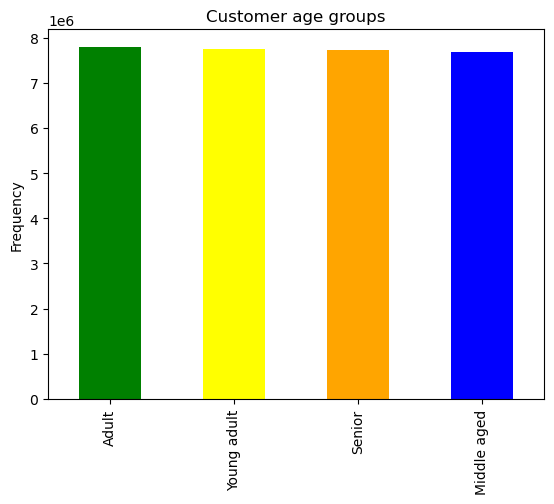

In [49]:
#Age 

age_customers = ords_prods_cust_merge['Customer age group'].value_counts().plot.bar(color = ['green', 'yellow', 'orange','blue'])

plt.ylabel('Frequency')
plt.title('Customer age groups',fontsize=12)
plt.show()


In [50]:
# Exporting the viz Age 

age_customers.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_customers.png'))

# 6.2. Customer income group

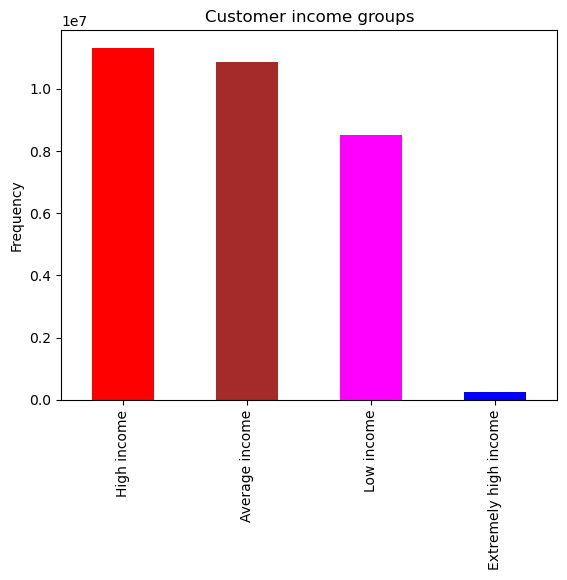

In [51]:
#Income 

income_customers = ords_prods_cust_merge['Customer income group'].value_counts().plot.bar(color = ['red', 'brown', 'magenta', 'blue'])

plt.ylabel('Frequency')
plt.title('Customer income groups',fontsize=12)
plt.show()

In [52]:
# Exporting the viz Age 

income_customers.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_customers.png'))

# 6.3. Family type

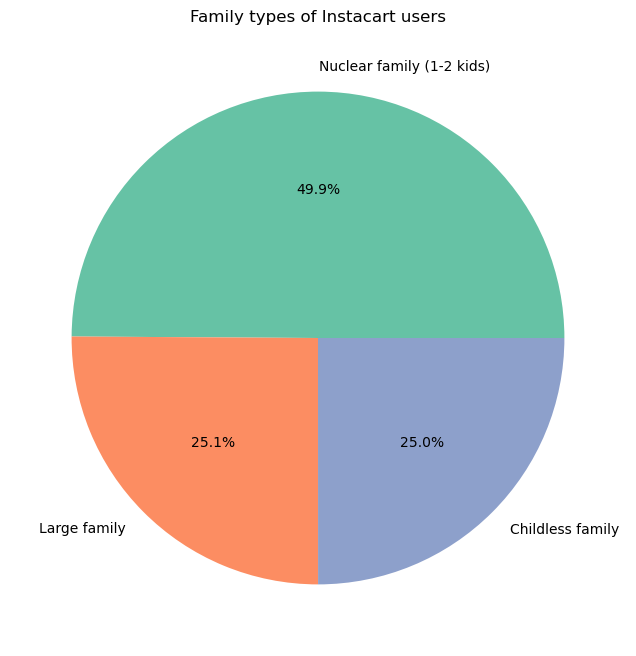

In [53]:
#Family type viz
family_type = ords_prods_cust_merge['Family type'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Set2', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Family types of Instacart users',fontsize=12)
plt.show()



In [54]:
#Export Family type viz

family_type.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_type_pie.png'))


# 6.4. Food preferences

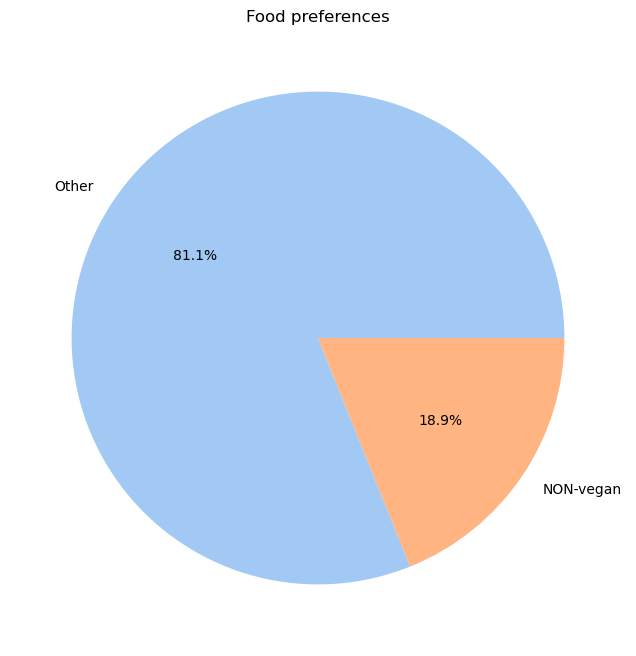

In [55]:
#'Food preferences' viz

food_pref = ords_prods_cust_merge['Food preferences'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('pastel', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Food preferences',fontsize=12)
plt.show()


In [56]:
#Exporting Food preferences 

food_pref.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'food_pref.png'))


# 7. Aggregation of  the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [57]:
#I noticed that for some reason the column 'prices' still has outliers (99999).
#I flagged the missing values (99999) in 'prices' as NaNs (replace them in the column 'prices')

ords_prods_cust_merge.loc[ords_prods_cust_merge['prices'] >100, 'prices'] = np.nan

In [58]:
#Check the max

ords_prods_cust_merge['prices'].max()

25.0

# 7.1. Customer age group 

In [59]:
#Grouping by Customer age group 

ords_prods_cust_merge.groupby('Customer age group').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})



days_since_prior_order               prices           
                                     mean   max  min      mean   max  min
Customer age group                                                       
Adult                           10.771745  30.0  0.0  7.793472  25.0  1.0
Middle aged                     10.832385  30.0  0.0  7.789970  25.0  1.0
Senior                          10.795536  30.0  0.0  7.794342  25.0  1.0
Young adult                     10.841878  30.0  0.0  7.784572  25.0  1.0

**The statistics across all age groups are quite similar. Seniors prefer to spend slightly more than the other groups; adults are the most active customers. Middle aged group prefers to buy more affordable goods.** 

# 7.2. Customer income group

In [60]:
#Grouping by 'Customer income group'

ords_prods_cust_merge.groupby('Customer income group').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})



days_since_prior_order               prices           
                                        mean   max  min      mean   max  min
Customer income group                                                       
Average income                     10.756942  30.0  0.0  7.957021  25.0  1.0
Extremely high income              10.093070  30.0  0.0  7.777393  25.0  1.0
High income                        10.783693  30.0  0.0  7.956545  25.0  1.0
Low income                         10.935594  30.0  0.0  7.358224  25.0  1.0

**As expected, users with low income prefer to save money and buy cheapest items (these users are also the least frequent users). Users with average and high income tend to use the Instacart more or less equally in terms of frequency and spend similarly, whereas users with high income spend less than average and high income.** 

# 7.3. Family type

In [61]:
#Grouping by 'Family type'

ords_prods_cust_merge.groupby('Family type').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})



days_since_prior_order               prices        \
                                            mean   max  min      mean   max   
Family type                                                                   
Childless family                       10.791951  30.0  0.0  7.789550  25.0   
Large family                           10.816223  30.0  0.0  7.792886  25.0   
Nuclear family (1-2 kids)              10.816513  30.0  0.0  7.789957  25.0   

                                
                           min  
Family type                     
Childless family           1.0  
Large family               1.0  
Nuclear family (1-2 kids)  1.0

**There are no large differences between the groups, however large families (followed by nuclear families) tend to buy more expensive items than others. The customer activity difference is not significant across the groups, only childless families order slightly more often than the other groups.**

# 7.4. Food preferences 

In [62]:
#Grouping by 'Food preferences'

ords_prods_cust_merge.groupby('Food preferences').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})



days_since_prior_order               prices           
                                   mean   max  min      mean   max  min
Food preferences                                                       
NON-vegan                     10.756818  30.0  0.0  9.255416  25.0  1.0
Other                         10.822787  30.0  0.0  7.449528  20.0  1.0

**Non-vegans tend to spend more money on products (probably, because meat and seafood is expensive) - on average about 2dollars more. Non-vegans also order slightly more often than the other group.** 

# Step 8. Customer profiles across regions and departments (crosstables)

# 8.1. Customer profiles across regions 

# 8.1.1. Customer age group

In [63]:
#Create a cross table to see the relationship between customer age groups and regions. 

crosstab_regions_age = pd.crosstab(ords_prods_cust_merge['Region'], ords_prods_cust_merge['Customer age group'], dropna = False)



In [64]:
crosstab_regions_age

Customer age group,Adult,Middle aged,Senior,Young adult
Region,,,,
Midwest,1854288,1804105,1799606,1803514
Northeast,1363436,1338892,1394490,1367867
South,2593671,2552734,2549034,2615700
West,1979429,1989710,1987704,1970384


**In general, in each region, there is a relatively equal division between the age groups in terms of customer numbers. Most of the customers of all ages live in the South, the lowest number of customers of all age groups is in Northeast.In the Midwest, the highest number of customers is represented by Adults, the lowest - by Seniors; in Northeast -  the highest - by Seniors, the lowest - by Middle Aged; in South - the highest - by Young Adults, the lowest - by Seniors; in the West - the highest - by Middle Ages, the lowest - by Young Adults** 

# 8.1.2. Customer income group 

In [65]:
#Create a cross table to see the relationship between customer income groups and regions. 

crosstab_regions_income = pd.crosstab(ords_prods_cust_merge['Region'], ords_prods_cust_merge['Customer income group'], dropna = False)



In [66]:
crosstab_regions_income

Customer income group,Average income,Extremely high income,High income,Low income
Region,,,,
Midwest,2533753,64093,2689401,1974266
Northeast,1919224,40106,2018547,1486808
South,3651868,83446,3726287,2849538
West,2769050,66497,2881759,2209921


**As expected, most of the customers with different types of income live in South (due to the fact that this region has the highest number of customers in general). There is a similar number of customers with Average and High incomes. There is also the largest number of people with low income and the highest number of people with extremely high income. 
Midwest and West have similar stats, whereas Northeast has the lowest numbers in all income groups** 

# 8.1.3. Family type

In [67]:
#Create a cross table to see the relationship between family types and regions. 

crosstab_regions_families = pd.crosstab(ords_prods_cust_merge['Region'], ords_prods_cust_merge['Family type'], dropna = False)



In [68]:
crosstab_regions_families

Family type,Childless family,Large family,Nuclear family (1-2 kids)
Region,,,
Midwest,1822816,1787286,3651411
Northeast,1354482,1381233,2728970
South,2581933,2585864,5143342
West,1980450,2018133,3928644


**In terms of ranking, the same situation is regarding family type/region relationship. 
In all regions, the number of childless families and large families is similar; there is a drastic difference between the number of nuclear families and large/childless families: in all regions there are two times more nuclear families than other family types.**

# 8.1.4. Food preferences 

In [69]:
#Create a cross table to see the relationship between food preferences and regions. 

crosstab_regions_food = pd.crosstab(ords_prods_cust_merge['Region'], ords_prods_cust_merge['Food preferences'], dropna = False)



In [70]:
crosstab_regions_food

Food preferences,NON-vegan,Other
Region,,
Midwest,1370750,5890763
Northeast,1033187,4431498
South,1947136,8364003
West,1500890,6426337


**Most of the non-vegans and other live in the South. Interesting to look at the proportions of the groups in each region: 20/80 (Non-vegan/Other) across all regions.** 

# 8.2. Customer profiles across departments

# 8.2.1. Customer age group¶

In [110]:
#Create a cross table to see the relationship between customer age groups and departments. 

crosstab_age_dep = pd.crosstab(ords_prods_cust_merge['department'], ords_prods_cust_merge['Customer age group'], dropna = False)



In [111]:

crosstab_age_dep

Customer age group,Adult,Middle aged,Senior,Young adult
department,,,,
alcohol,35893,35843,34691,38200
babies,107219,101702,100162,101309
bakery,281307,279757,278458,281306
beverages,643821,644645,646414,637021
breakfast,168301,167111,165491,169947
bulk,8530,8107,8336,8478
canned goods,253475,251607,251940,255052
dairy eggs,1307254,1272904,1291039,1305985
deli,253138,249127,250463,251106


**In each department, there is no significant difference between the age groups. 
Department 4 (produce) is the most popular one for all age groups, with Adults leading in number of purchases. It is followed by departments 16 (dairy eggs) and 19 (snacks). Interestingly enough, young adults buy more alcohol (ID 5)quite significantly than other groups.** 

# 8.2.2. Customer income group

In [112]:
#Create a cross table to see the relationship between customer income groups and departments. 

crosstab_income_dep = pd.crosstab(ords_prods_cust_merge['department'], ords_prods_cust_merge['Customer income group'], dropna = False)



In [113]:
crosstab_income_dep

Customer income group,Average income,Extremely high income,High income,Low income
department,,,,
alcohol,46947,6127,51591,39962
babies,157042,2104,156075,95171
bakery,399162,12604,416396,292666
beverages,852287,24661,890717,804236
breakfast,224233,6529,235897,204191
bulk,11822,27,11335,10267
canned goods,366398,9089,388057,248530
dairy eggs,1851121,44307,1917948,1363806
deli,353676,7308,369011,273839


**Dairy eggs, produce, beverages and snacks are leaders in all income groups.**

# 8.2.3. Family groups by departments

In [126]:
#Create a cross table to see the relationship between customer family groups and departments. 

crosstab_fam_dep = pd.crosstab(ords_prods_cust_merge['department'], ords_prods_cust_merge['Family type'], dropna = False)



In [127]:
crosstab_fam_dep

Family type,Childless family,Large family,Nuclear family (1-2 kids)
department,,,
alcohol,36827,37333,70467
babies,103328,102585,204479
bakery,281395,279822,559611
beverages,645341,640927,1285633
breakfast,166432,167322,337096
bulk,8000,8403,17048
canned goods,251020,255325,505729
dairy eggs,1294376,1296264,2586542
deli,253382,252592,497860


**The distribution is fairly equal. There are 2x more purchases by nuclear families, but this is influenced by number of values (2x more than in other family groups). Large families consume more alcohol and dry goods pasta, and meat and seafood.**

# 8.2.4. Food preferences by departments 

In [131]:
#Create a cross table to see the relationship between food preferences and departments. 

food_dep = pd.crosstab(ords_prods_cust_merge['department'], ords_prods_cust_merge['Food preferences'], dropna = False)



In [132]:
food_dep

Food preferences,NON-vegan,Other
department,,
alcohol,0,144627
babies,0,410392
bakery,0,1120828
beverages,0,2571901
breakfast,0,670850
bulk,0,33451
canned goods,0,1012074
dairy eggs,5177182,0
deli,0,1003834


**While this is clear that non-vegans buy dairy eggs and meat seafood (the latter - less), possible vegans and vegetarians prefer buying more produce, snacks, frozen food, pantry, and beverages**

# 9. Visualizations of step 8

# 9.1. Preparatory work

**For visualizations, I prefer to use the actual titles of the departments, not the IDs. I have to merge the department table with the existing prods_ords_cust_merge table.**

In [75]:
#Import df 'departments_with_id'

dep = pd.read_csv(os.path.join(path, '02 Data ', 'Prepared data', 'departments_with_id.csv'), index_col = False)

In [76]:
dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [77]:
#Rename the column Unnamed:0 to department_id 

dep.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [78]:
#Changing the data type of department_id in dep

dep['department_id'] = dep['department_id'].astype('str')

In [79]:
#Delete the _merge column 

ords_prods_cust_merge = ords_prods_cust_merge.drop(columns = ['_merge'])

In [83]:
#Changing the data type of department_id in ords_prods_cust_merge 
ords_prods_cust_merge['department_id'] = ords_prods_cust_merge['department_id'].astype('str')

In [85]:
#Merge the dfs

ords_prods_cust_merge = ords_prods_cust_merge.merge(dep, on = 'department_id', indicator = True)

# 9.2. Visualizations for regions 

# 9.2.1. Customer age group across regions

Text(0, 0.5, 'Frequency')

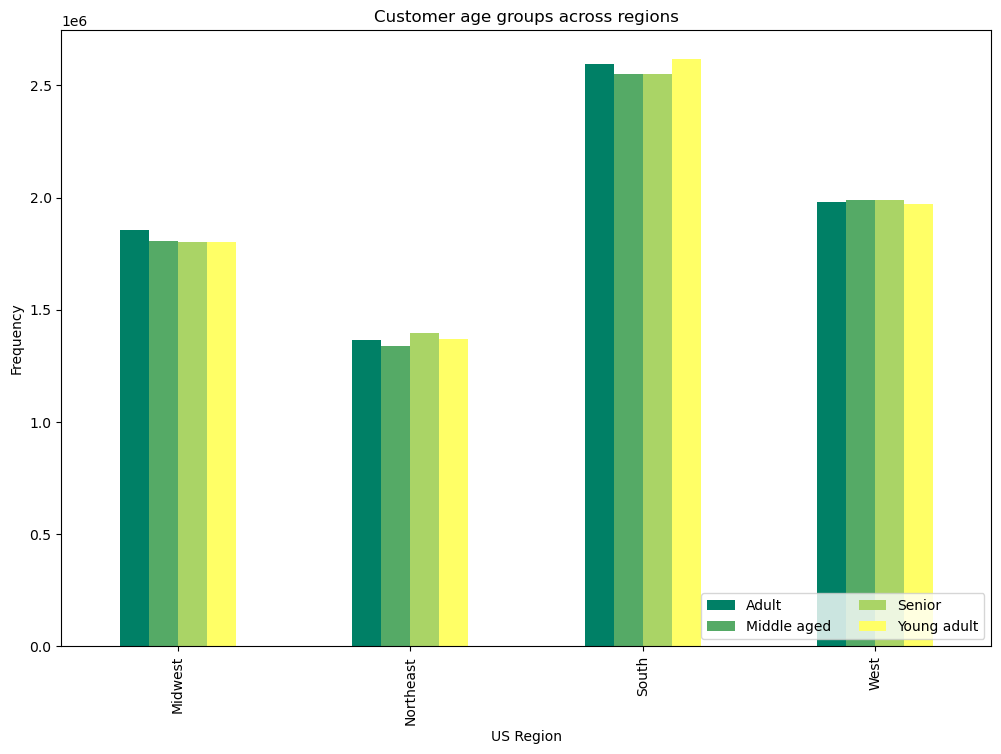

In [97]:
#Create a viz: Age groups across regions  

age_region_bar = crosstab_regions_age.plot.bar(colormap = 'summer',
                                                   figsize = (12, 8)) 
plt.title('Customer age groups across regions')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('US Region')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')

In [98]:
#Export the viz Age groups across regions 

age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

# 9.2.2. Customer income group across regions


Text(0, 0.5, 'Frequency')

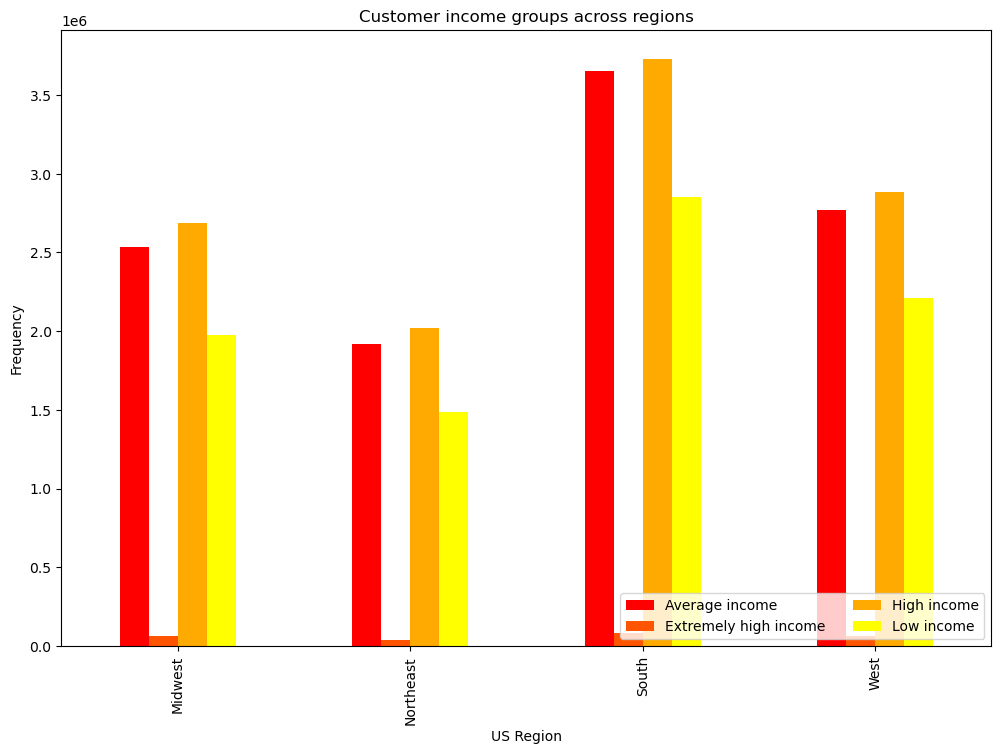

In [100]:
#Create a viz: Income groups across regions  

income_region_bar = crosstab_regions_income.plot.bar(colormap = 'autumn',
                                                   figsize = (12, 8)) 
plt.title('Customer income groups across regions')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('US Region')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')



In [101]:
#Export viz Income groups across regions 

income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

# 9.2.3. Family type across regions 

Text(0, 0.5, 'Frequency')

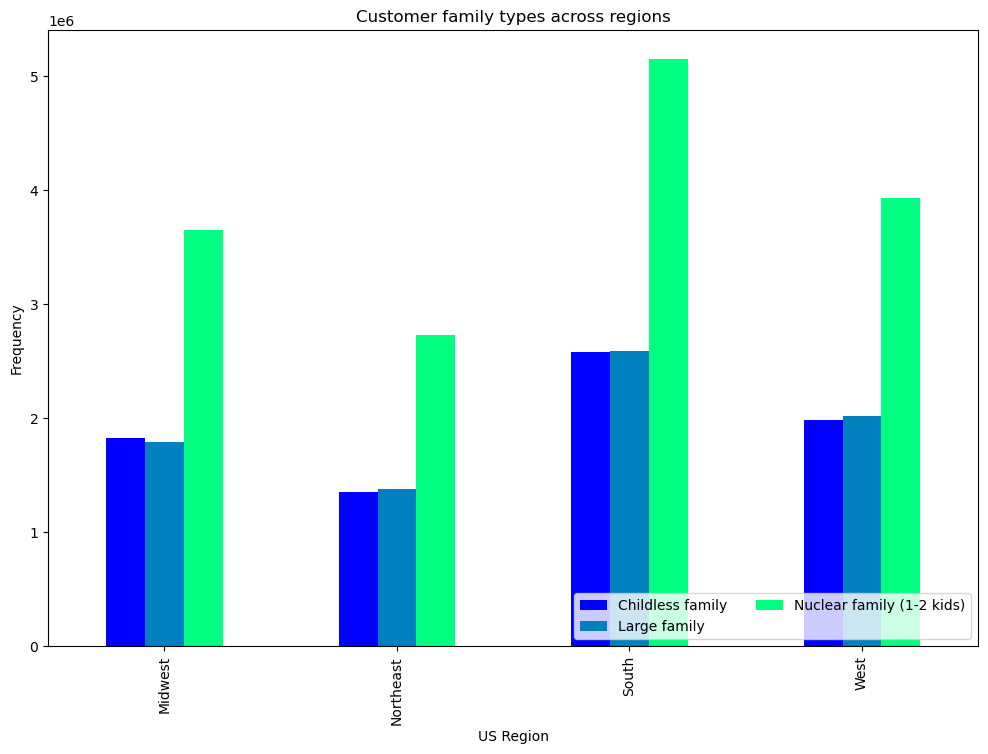

In [103]:
#Create a viz: Family groups across regions  

family_region_bar = crosstab_regions_families.plot.bar(colormap = 'winter',
                                                   figsize = (12, 8)) 
plt.title('Customer family types across regions')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('US Region')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')

In [104]:
#Export viz family groups across regions 

family_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_region_bar.png'))

# 9.2.4. Food preferences across regions 

Text(0, 0.5, 'Frequency')

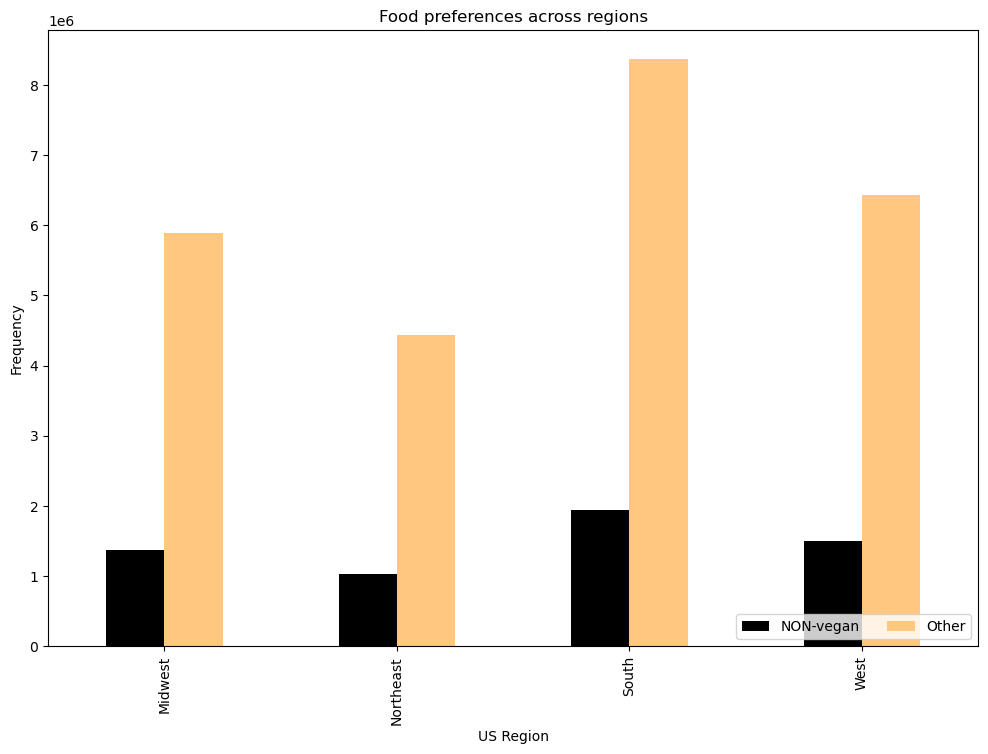

In [108]:
food_region_bar = crosstab_regions_food.plot.bar(colormap = 'copper',
                                                   figsize = (12, 8)) 
plt.title('Food preferences across regions')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('US Region')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')

In [109]:
#Export viz family groups across regions 

food_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'food_region_bar.png'))

# 9.3. Visualizations for departments 

# 9.3.1. Customer age groups across departments 

Text(0, 0.5, 'Frequency')

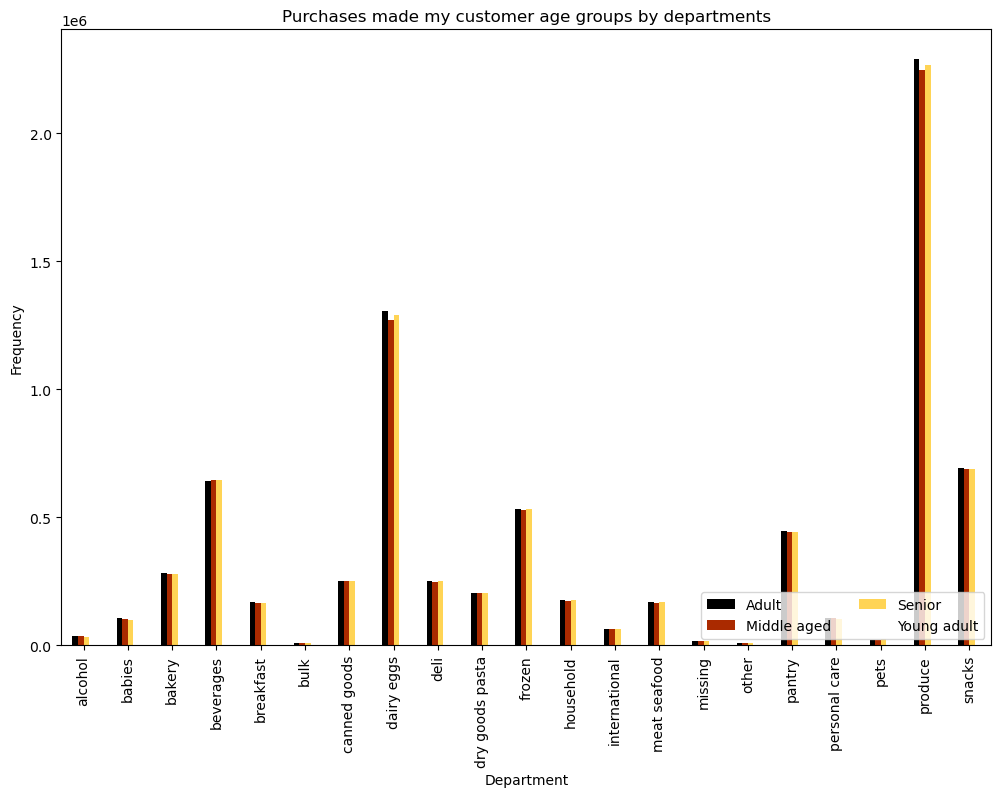

In [120]:
#Create a viz for age group purchases across deparments 

age_dep_bar = crosstab_age_dep.plot.bar(colormap = 'afmhot',
                                                   figsize = (12, 8)) 
plt.title('Purchases made my customer age groups by departments')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')

In [121]:
#Export viz age groups across departments  

age_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dep_bar.png'))

# 9.3.2. Customer income groups by departments

Text(0, 0.5, 'Frequency')

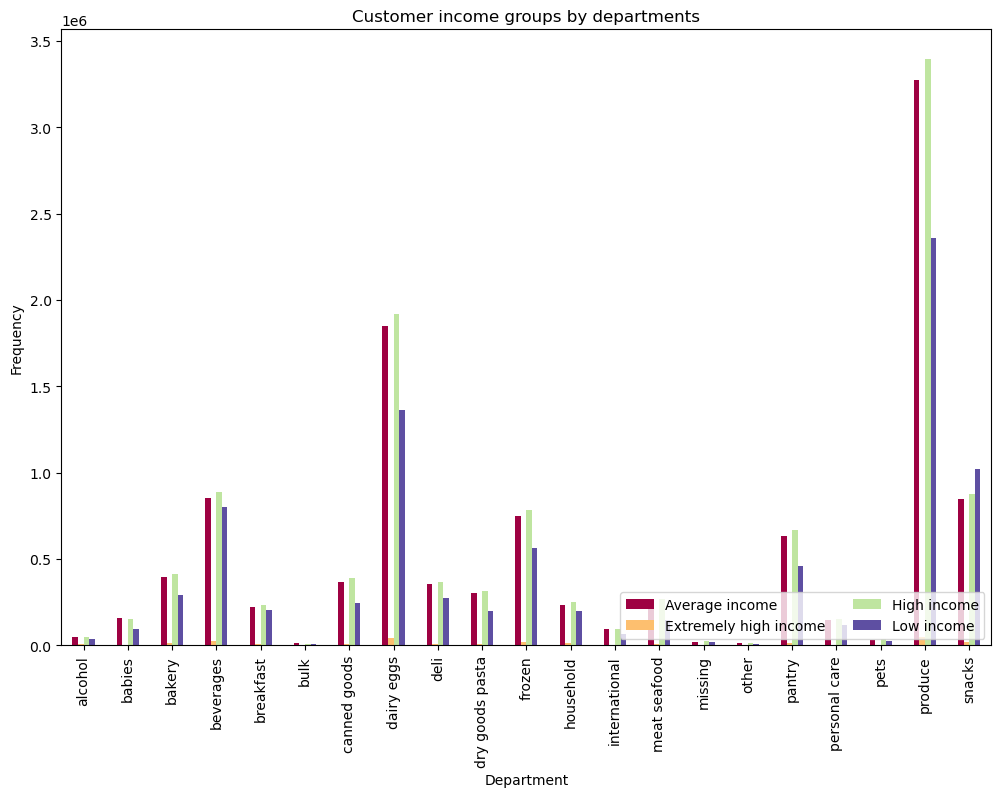

In [125]:
#Create a viz for income groups across deparments 

income_dep_bar = crosstab_income_dep.plot.bar(colormap = 'Spectral',
                                                   figsize = (12, 8)) 
plt.title('Customer income groups by departments')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')

In [124]:
#Export viz income groups across departments  

income_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_dep_bar.png'))

# 9.3.3. Family types by departments

Text(0, 0.5, 'Frequency')

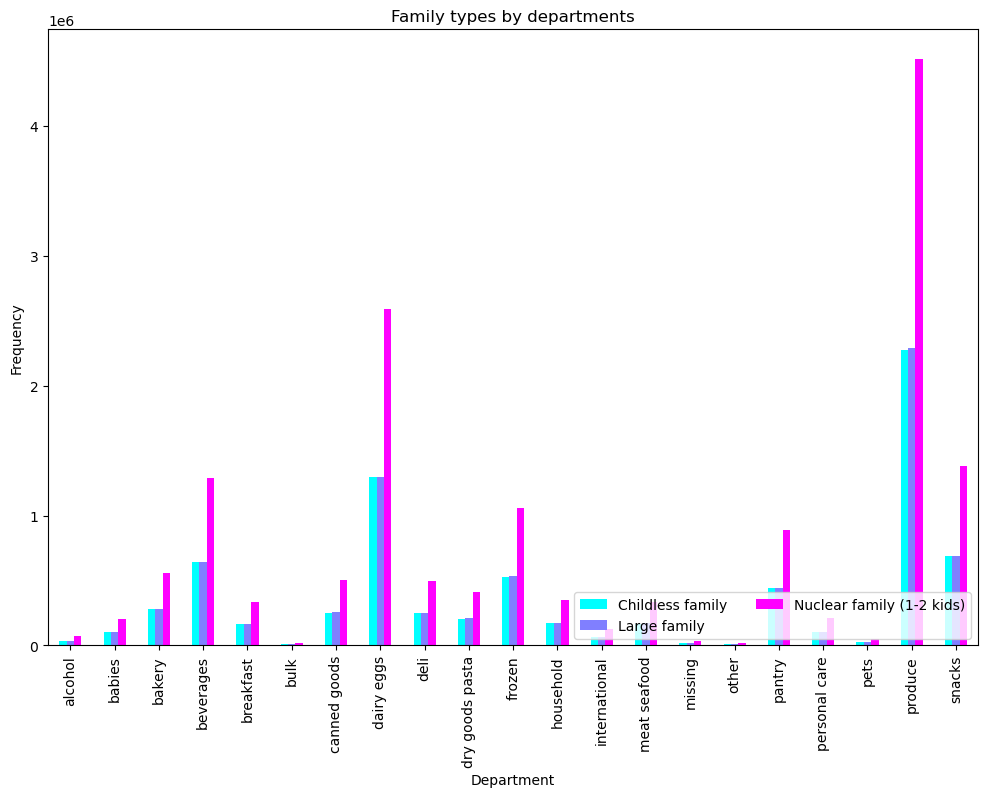

In [133]:
#Create a viz for family types across deparments 

fam_dep_bar = crosstab_fam_dep.plot.bar(colormap = 'cool',
                                                   figsize = (12, 8)) 
plt.title('Family types by departments')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')

In [134]:
#Export viz family types by departments

fam_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_dep_bar.png'))

# 9.3.4. Food preferences by departments

Text(0, 0.5, 'Frequency')

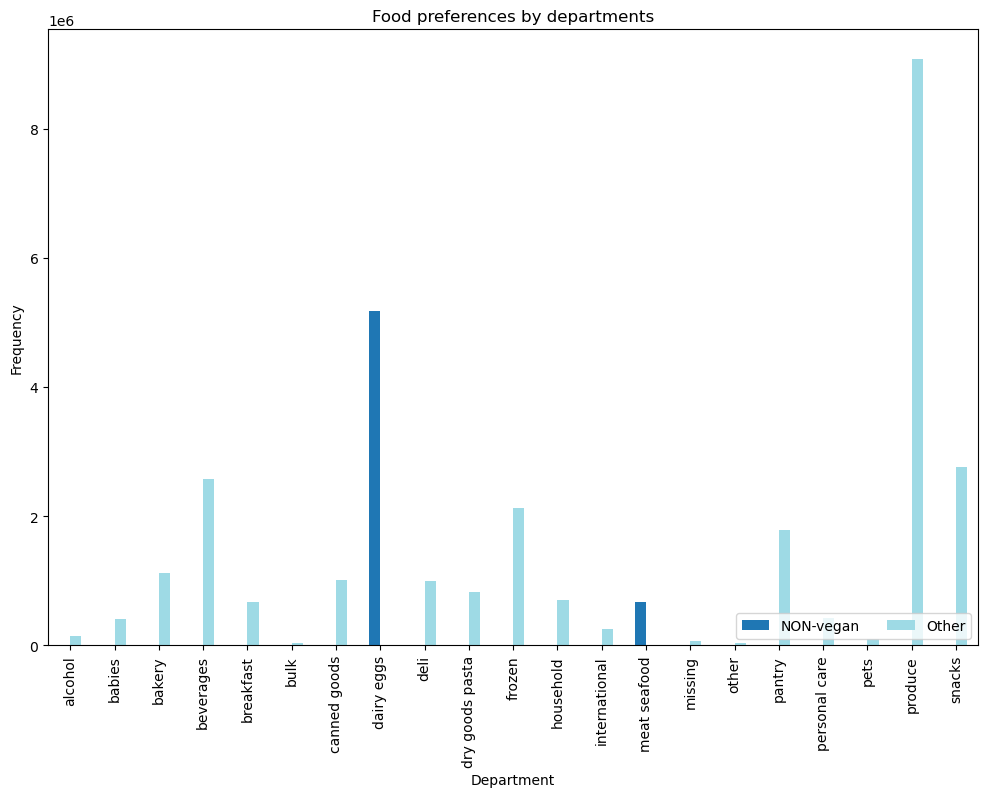

In [136]:
#Create a viz for food preferences across deparments 

food_dep_bar = food_dep.plot.bar(colormap = 'tab20',
                                                   figsize = (12, 8)) 
plt.title('Food preferences by departments')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')

In [137]:
#Export viz food pref by departments

food_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'food_dep_bar.png'))

# 10. Additional visualizations 

# 10.1. Price ranges 

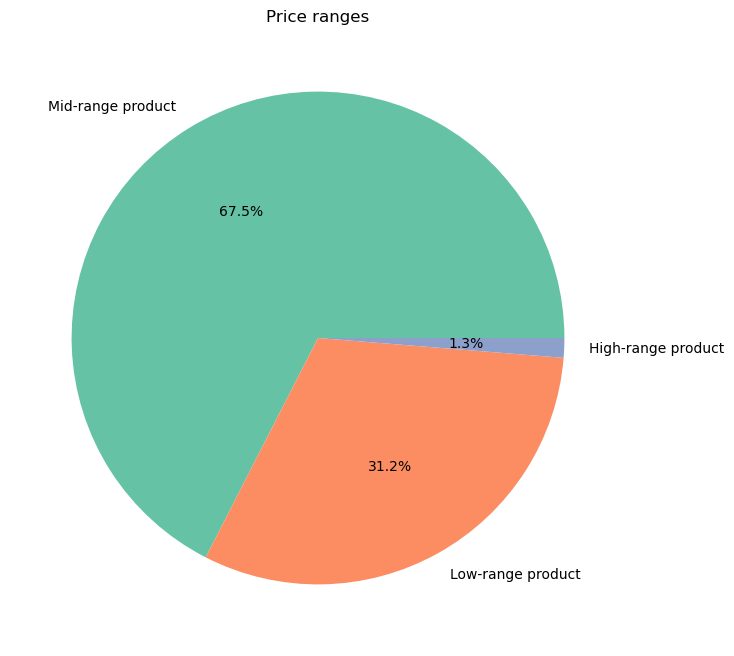

In [142]:
#Creating viz for different price ranges

price_ranges = ords_prods_cust_merge['price_range_loc'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Set2', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Price ranges',fontsize=12)
plt.show()

In [143]:
#Export viz price ranges 

price_ranges.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_ranges.png'))

# 10.2. Orders by time of the day groups

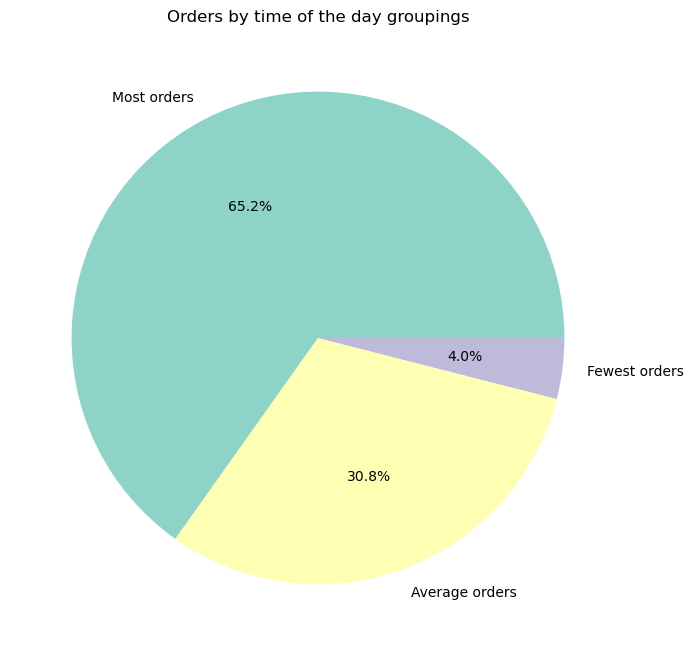

In [148]:
time_groups = ords_prods_cust_merge['busiest_period_of_day'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Set3', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Orders by time of the day groupings',fontsize=12)
plt.show()



In [149]:
#Export the viz
time_groups.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_time_of_day_pie.png'))

# 10.3. Brand loyalty groups

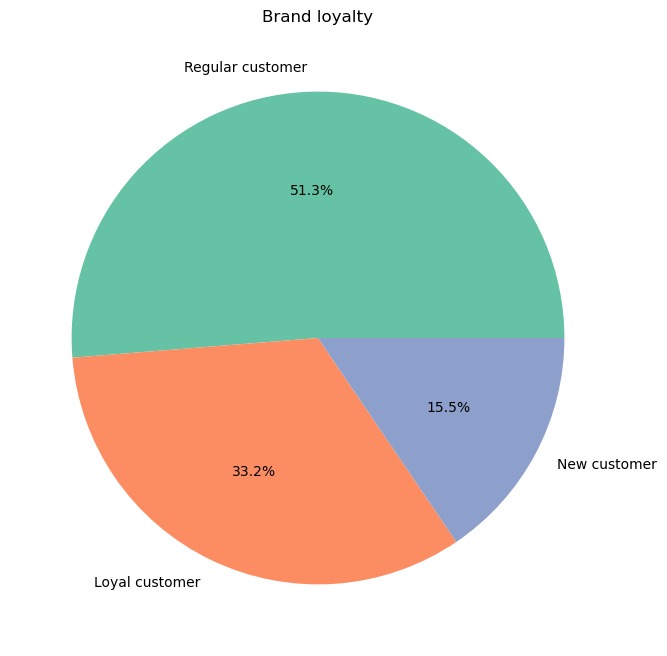

In [155]:
#Pie loyalty flags
loyalty_cust = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Set2', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Brand loyalty',fontsize=12)
plt.show()


In [156]:
#Exporting loyalty customers bar 

loyalty_cust.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_customers.png'))

# 10.4. Brand loyalty and department popularity

In [157]:
#Relationship between loyalty groups and departments 

loyalty_dep = pd.crosstab(ords_prods_cust_merge['department'], ords_prods_cust_merge['loyalty_flag'], dropna = False)



In [158]:
loyalty_dep

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


Text(0, 0.5, 'Frequency')

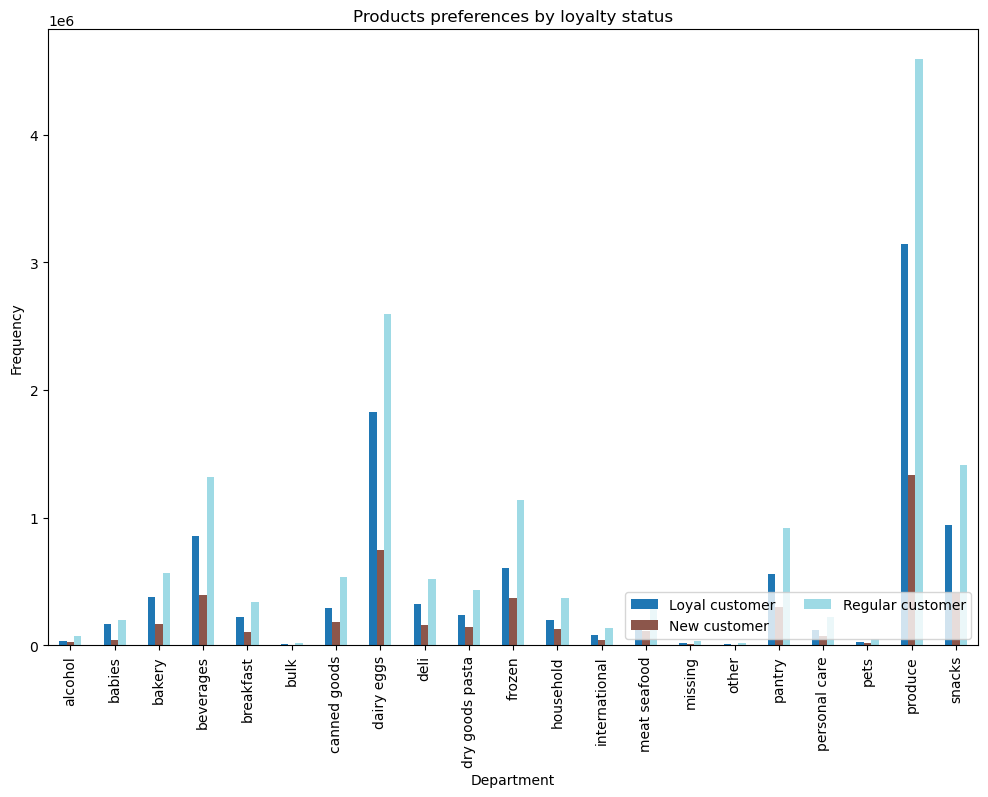

In [159]:
#Viz of the relationship between loyalty types and deparments 

loyalty_dep_bar = loyalty_dep.plot.bar(colormap = 'tab20',
                                                   figsize = (12, 8)) 
plt.title('Products preferences by loyalty status')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')


In [160]:
#Export viz of the relationship between loyalty types and deparments 

loyalty_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_dep_bar.png'))



# 10.5. Spender type pie

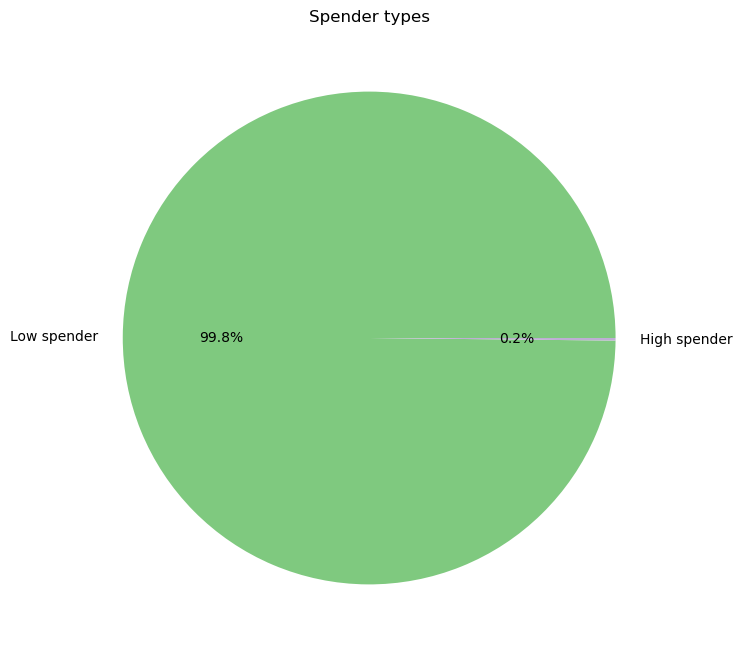

In [165]:
#Spender type viz 


spender_types = ords_prods_cust_merge['spender_type'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Accent', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Spender types', fontsize=12)
plt.show()

In [166]:
#Export viz of the relationship between loyalty types and deparments 

spender_types.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spender_types.png'))



# 11. Saving the dataframe


In [ ]:
ords_prods_cust_merge.to_pickle(os.path.join(path, '02 Data ', 'Prepared data', 'ords_prods_cust_merge_4.10.pkl'))